In [23]:
%matplotlib inline
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [24]:
def clean_data(df):
    df.replace({'Trim' : { np.nan : 'NS'}}, inplace=True)
    df.replace({'SubModel' : { np.nan : 'NS'}}, inplace=True)
    df.replace({'Color' : { np.nan : 'NS'}}, inplace=True)
    df.replace({'Transmission' : { np.nan : 'NS'}}, inplace=True)
    df.replace({'WheelTypeID' : { np.nan : 'NS'}}, inplace=True)
    df.replace({'WheelType' : { np.nan : 'NS'}}, inplace=True)
    df.replace({'Nationality' : { np.nan : 'NS'}}, inplace=True)
    df.replace({'Size' : { np.nan : 'NS'}}, inplace=True)
    df.replace({'TopThreeAmericanName' : { np.nan : 'NS'}}, inplace=True)
    df.replace({'MMRAcquisitionAuctionAveragePrice' : { np.nan : 0}}, inplace=True)
    df.replace({'MMRAcquisitionAuctionCleanPrice' : { np.nan : 0}}, inplace=True)
    df.replace({'MMRAcquisitionRetailAveragePrice' : { np.nan : 0}}, inplace=True)
    df.replace({'MMRAcquisitonRetailCleanPrice' : { np.nan : 0}}, inplace=True)
    df.replace({'MMRCurrentAuctionAveragePrice' : { np.nan : 0}}, inplace=True)
    df.replace({'MMRCurrentAuctionCleanPrice' : { np.nan : 0}}, inplace=True)
    df.replace({'MMRCurrentRetailAveragePrice' : { np.nan : 0}}, inplace=True)
    df.replace({'MMRCurrentRetailCleanPrice' : { np.nan : 0}}, inplace=True)
    df.replace({'PRIMEUNIT' : { np.nan : 'NS'}}, inplace=True)
    df.replace({'AUCGUART' : { np.nan : 'NS'}}, inplace=True)

    df['Transmission'] = df['Transmission'].str.upper()

    df = df.drop('PurchDate', axis=1)
    df = df.drop('VehYear',axis=1)
    df = df.drop('WheelTypeID', axis=1)
    df = df.drop('TopThreeAmericanName', axis=1)
    df = df.drop('BYRNO', axis=1)

    auctions = sorted(df['Auction'].unique())
    vehicleAges = sorted(df['VehicleAge'].unique())
    makes = sorted(df['Make'].unique())
    models = sorted(df['Model'].unique())
    trims = sorted(df['Trim'].unique())
    subModels = sorted(df['SubModel'].unique())
    colors = sorted(df['Color'].unique())
    transmissions = sorted(df['Transmission'].unique())
    wheeltypes = sorted(df['WheelType'].unique())
    vehOdos = sorted(df['VehOdo'].unique())
    nationalities = sorted(df['Nationality'].unique())
    sizes = sorted(df['Size'].unique())
    demands = sorted(df['PRIMEUNIT'].unique())
    guarantees = sorted(df['AUCGUART'].unique())
    zipcodes = sorted(df['VNZIP1'].unique())    #VNZIP1
    states = sorted(df['VNST'].unique())        #VNST
    vehcosts = sorted(df['VehBCost'].unique())
    onlinesales = sorted(df['IsOnlineSale'].unique())
    warranties = sorted(df['WarrantyCost'].unique())
    
    auctionsDictionary = dict(zip(auctions,range(0, len(auctions)+1)))
    makesDictionary = dict(zip(makes,range(0, len(makes)+1)))
    modelsDictionary = dict(zip(models,range(0, len(models)+1)))
    trimsDictionary = dict(zip(trims,range(0, len(trims)+1)))
    subModelsDictionary = dict(zip(subModels,range(0, len(subModels)+1)))
    colorsDictionary = dict(zip(colors,range(0, len(colors)+1)))
    transmissionsDictionary = dict(zip(transmissions,range(0, len(transmissions)+1)))
    wheeltypesDictionary = dict(zip(wheeltypes,range(0, len(wheeltypes)+1)))
    nationalitiesDictionary = dict(zip(nationalities,range(0, len(nationalities)+1)))
    sizesDictionary = dict(zip(sizes,range(0, len(sizes)+1)))
    demandsDictionary = dict(zip(demands,range(0, len(demands)+1)))
    guaranteesDictionary = dict(zip(guarantees,range(0, len(guarantees)+1)))
    vehcostsDictionary = dict(zip(vehcosts,range(0, len(vehcosts)+1)))  #not object but mapped as dictionary
    zipcodesDictionary = dict(zip(zipcodes,range(0, len(zipcodes)+1)))  #not object but mapped as dictionary
    statesDictionary = dict(zip(states,range(0, len(states)+1)))
    warrantiesDictionary = dict(zip(warranties,range(0, len(warranties)+1)))
    
    df['AuctionVal'] = df['Auction'].map(auctionsDictionary)
    df['MakeVal'] = df['Make'].map(makesDictionary)
    df['ModelVal'] = df['Model'].map(modelsDictionary)
    df['TrimVal'] = df['Trim'].map(trimsDictionary)
    df['SubModelVal'] = df['SubModel'].map(subModelsDictionary)
    df['ColorVal'] = df['Color'].map(colorsDictionary)
    df['TransmissionVal'] = df['Transmission'].map(transmissionsDictionary)
    df['WheelTypeVal'] = df['WheelType'].map(wheeltypesDictionary)
    df['NationalityVal'] = df['Nationality'].map(nationalitiesDictionary)
    df['SizeVal'] = df['Size'].map(sizesDictionary)
    df['PRIMEUNITVal'] = df['PRIMEUNIT'].map(demandsDictionary)
    df['AUCGUARTVal'] = df['AUCGUART'].map(guaranteesDictionary)
    df['VehBCostVal'] = df['VehBCost'].map(vehcostsDictionary)
    df['VNZIP1Val'] = df['VNZIP1'].map(zipcodesDictionary)
    df['VNSTVal'] = df['VNST'].map(statesDictionary)
    df['WarrantyCostVal'] = df['WarrantyCost'].map(warrantiesDictionary)

    #dfFeatureSelection = df.drop(['RefId','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice',
    #                             'MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice',
    #                             'MMRCurrentRetailCleanPrice'], axis=1)

    #dfFeatureSelection = dfFeatureSelection.drop(['Auction','Make','Model','Trim','SubModel','Color','Transmission','WheelType','Nationality','Size',
    #                              'PRIMEUNIT','AUCGUART','VehBCost','VNZIP1','VNST','WarrantyCost'], axis=1)
    
    return df

In [25]:
df = pd.read_csv("training.csv") 
df = clean_data(df)

# USE THIS CODE UNTIL THE END ONLY IF YOU WHAT TO BALANCE THE DATA
df_goodbuy = df[df['IsBadBuy'].map(lambda x: x == 0)]
df_badbuy = df[df['IsBadBuy'].map(lambda x: x == 1)]

df_goodbuy = df_goodbuy.sample(frac=1)
df_goodbuy = df_goodbuy[:][:len(df_badbuy)]

frames = [df_goodbuy, df_badbuy]
df = pd.concat(frames)

In [26]:
df_train = pd.concat([
    df['IsBadBuy'],
    df['VehicleAge'],
    df['VehOdo'],
    #df['IsOnlineSale'],
    df['AuctionVal'],
    df['MakeVal'],
    #df['ModelVal'],
    #df['TrimVal'],
    #df['SubModelVal'],
    #df['ColorVal'],
    #df['TransmissionVal'],
    df['WheelTypeVal'],
    df['NationalityVal'],
    #df['SizeVal'],
    #df['PRIMEUNITVal'],
    #df['AUCGUARTVal'],
    df['VehBCostVal'],
    #df['VNZIP1Val'],
    df['VNSTVal'],
    df['WarrantyCostVal']
    ],
    axis=1)

In [27]:
#Convert the DataFrame to a numpy array:
train_data = df_train.values

In [28]:
# Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

# 'Survived' column values
train_target = train_data[:, 0]

In [29]:
train_features[0]

array([    4, 51165,     1,     3,     0,     0,   756,     4,    15])

In [30]:
train_target[1]

0

In [31]:
# Fit the model to our training data
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                  min_samples_split=2, min_samples_leaf=2)
clf = clf.fit(train_features, train_target)

In [32]:
clf.feature_importances_

array([ 0.08417353,  0.23826603,  0.03268459,  0.06686742,  0.16052686,
        0.00759826,  0.22123725,  0.08804958,  0.10059648])

In [33]:
pred_target = clf.predict(train_features)

print metrics.precision_score(train_target, pred_target, average='weighted')
print metrics.recall_score(train_target, pred_target, average='weighted')
print metrics.f1_score(train_target, pred_target, average='weighted')
print metrics.accuracy_score(train_target, pred_target)
print metrics.precision_recall_fscore_support(train_target, pred_target)

0.934161602185
0.930815508021
0.93068194904
0.930815508021
(array([ 0.8960467,  0.9722765]), array([ 0.97471034,  0.88692068]), array([ 0.93372465,  0.92763924]), array([8976, 8976]))


In [34]:
len(train_data)

17952

In [35]:
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)

In [36]:
train_x.shape, test_x.shape

((14361, 9), (3591, 9))

In [37]:
len(train_x), len(test_x), len(train_x) + len(test_x)

(14361, 3591, 17952)

In [38]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, 
                                  #min_samples_split=2, min_samples_leaf=10, 
                                  class_weight=None # 'balanced'
                                 )

clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, 
                                  #min_samples_split=2, min_samples_leaf=10, 
                                  class_weight=None # 'balanced'
                                 )

clf = clf.fit(train_x, train_y)

In [39]:
train_pred = clf.predict(train_x)
test_pred = clf.predict(test_x)

In [40]:
print metrics.accuracy_score(train_y, train_pred)
print metrics.accuracy_score(test_y, test_pred)

0.672724740617
0.660540239488


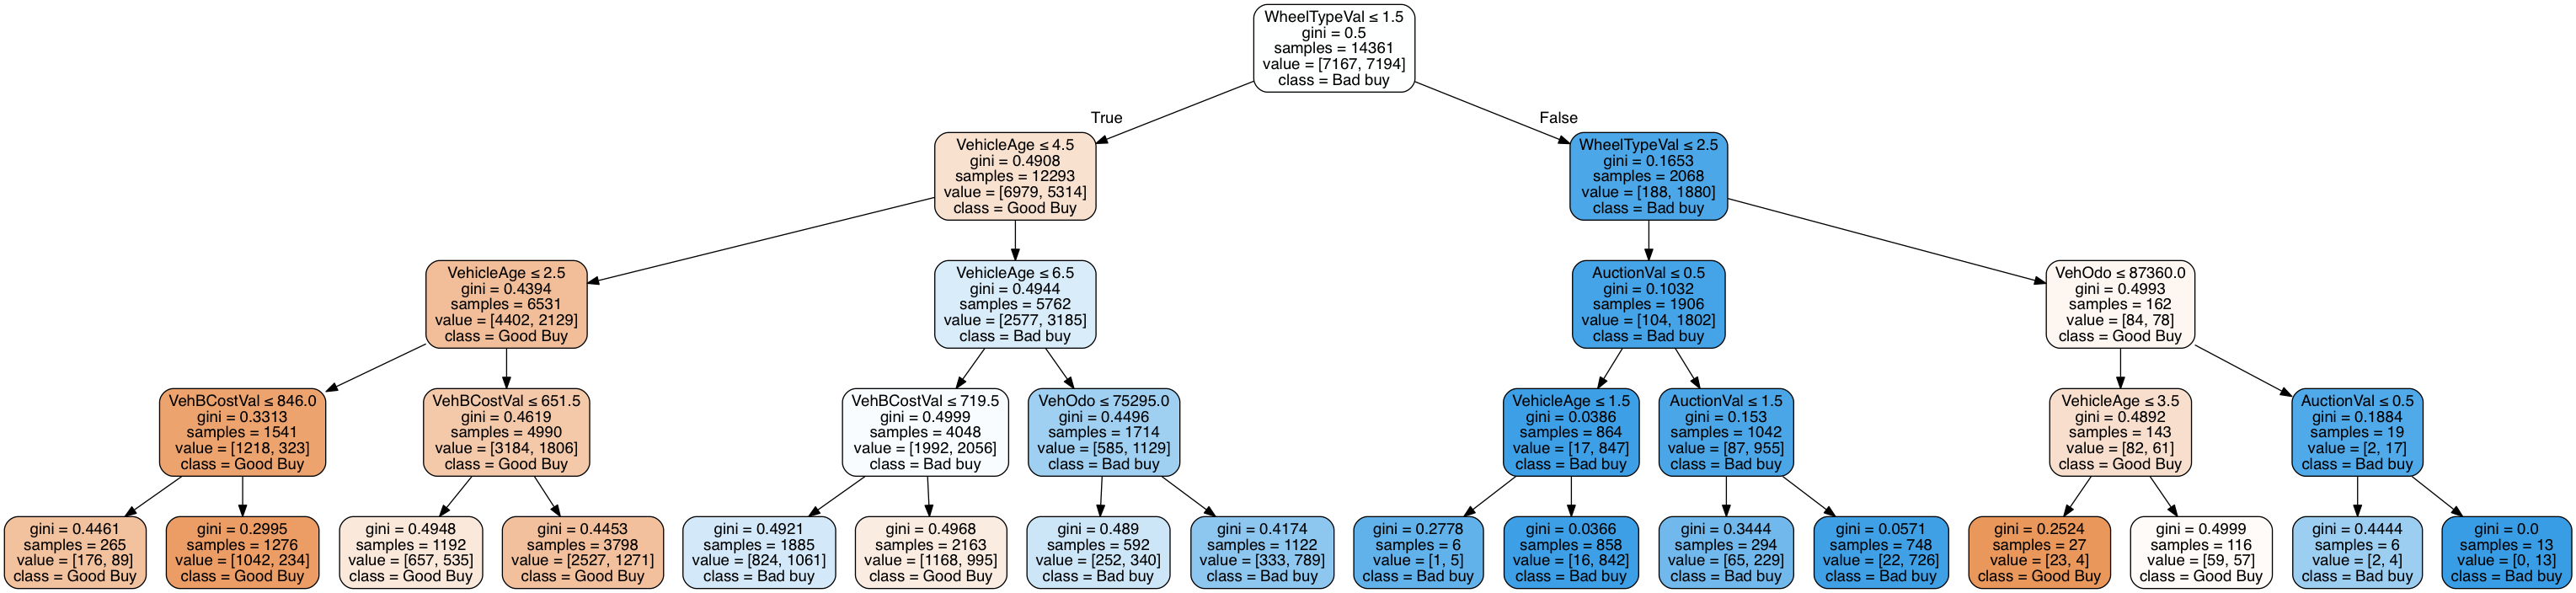

In [41]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(df_train.columns[1:]),  
                         class_names=['Good Buy', 'Bad buy'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [42]:
import pydotplus 
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image

dot_data = StringIO() 

tree.export_graphviz(clf, 
                    out_file=dot_data, 
                    feature_names=list(df_train.columns[1:]),  
                    class_names=['GoodBuy', 'BadBuy'],  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_pdf("decision_tree.pdf")

True

In [43]:
cm = confusion_matrix(test_y, test_pred)
print cm

test_y

[[1406  403]
 [ 816  966]]


array([1, 1, 0, ..., 0, 1, 1])

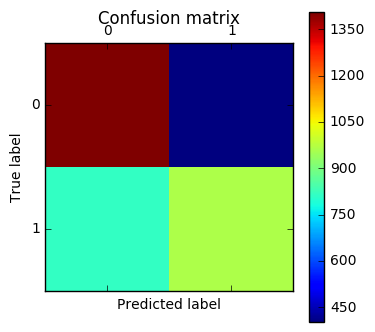

In [44]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            test_pred, 
                            target_names=['Good Buy', 'Bad Buy']))

             precision    recall  f1-score   support

   Good Buy       0.63      0.78      0.70      1809
    Bad Buy       0.71      0.54      0.61      1782

avg / total       0.67      0.66      0.66      3591



In [24]:
# cross validation
scores = cross_validation.cross_val_score(clf, train_features, train_target, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.89 (+/- 0.03)


In [276]:
# Random Forest
clf = RandomForestClassifier(n_estimators=30, 
                             criterion='gini',
                             max_features=None,
                             max_depth=5, 
                             min_samples_split=2,
                             min_samples_leaf=5,
                             bootstrap=True,
                             oob_score=False,
                             random_state=None,
                             class_weight=None) #balanced

clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

scores = cross_validation.cross_val_score(clf, train_features, train_target, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.67 (+/- 0.06)


In [261]:
lf = neighbors.KNeighborsClassifier(10, weights='distance')
scores = cross_validation.cross_val_score(lf, train_features, train_target, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.55 (+/- 0.01)


In [25]:
from scipy.stats import randint as sp_randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [26]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [27]:
clf = RandomForestClassifier(n_estimators=20)

In [28]:
param_dist = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12,None],
              "max_features": sp_randint(1, len(train_x[0]) + 1),
              "min_samples_split": sp_randint(10, 51),
              "min_samples_leaf": sp_randint(10, 51),
              "bootstrap": [True],
              "criterion": ["entropy", "gini"],
              "class_weight":[{0: 0.87, 1: 0.13}]}

n_iter_search = 100
search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, 
                            n_jobs=10, scoring=make_scorer(accuracy_score))

In [29]:
search.fit(train_features, train_target)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=10,
          param_distributions={'bootstrap': [True], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x118f81310>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x118ba2b10>, 'criterion': ['entropy', 'gini'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x118f81d90>, 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None], 'class_weight': [{0: 0.87, 1: 0.13}]},
          pre_dispatch='2*n_jobs', random_s

In [30]:
#report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]

search.best_estimator_.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=9, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=13, min_samples_split=38,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=524946557, splitter='best')

In [268]:
param_grid = {"max_depth": [2,3,4,5,6]}
search = GridSearchCV(clf, param_grid=param_grid, scoring=make_scorer(accuracy_score))

In [269]:
search.fit(train_features, train_target)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [270]:
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]

Model with rank: 1
Mean validation score: 0.640 (std: 0.017)
Parameters: {'max_depth': 4}

Model with rank: 2
Mean validation score: 0.639 (std: 0.019)
Parameters: {'max_depth': 6}

Model with rank: 3
Mean validation score: 0.637 (std: 0.019)
Parameters: {'max_depth': 3}



In [271]:
search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [272]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(search.best_estimator_, out_file=None, 
                         feature_names=list(df_train.columns[1:]),  
                         class_names=['Good buy', 'Bad buy'],  
                         filled=True, rounded=True,  
                         special_characters=True,
                               max_depth=5)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'